# Best Neighborhoods in Pittsburgh

## Metric 
**Monthly Crime Report** \
This metric represents monthly crime report data for different neighborhoods in Pittsburgh, sourced from WPRDC. It reflects the frequency of crimes occurring in each area. This measure helps identify which communities experience fewer criminal activities, thereby offering residents a greater sense of security.

In [7]:
import pandas as pd
%matplotlib inline

**Dataset Description (Summary)**

The Monthly Criminal Activity is a dataset published by the Pittsburgh Bureau of Police. It contains crime data reported in Pittsburgh in accordance with the National Incident-Based Reporting System (NIBRS) criteria. The dataset includes all updates for January 2024 to March 2025. All unique addresses and information about victims have been suppressed. "Crime data can change slightly with updates because information is subject to change with ongoing investigations" (WPRDC).

In [11]:
import os
os.chdir("/ihome/cmpinf0010_2025f/nat205/big_ideas/The-best-neighborhood-in-Pittsburgh")

In [12]:
data = pd.read_csv("Pittsburgh-Monthly-Crime-report.csv")

/scratch/slurm-22665/ipykernel_1217881/1389681279.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Pittsburgh-Monthly-Crime-report.csv")


In [14]:
#empty dict to count the neighborhoods and how many times the crime has been reported
count_neighborhoods ={}

for neighborhood in data["Neighborhood"]:
    if neighborhood in count_neighborhoods:
        count_neighborhoods[neighborhood]+=1
    else:
        count_neighborhoods[neighborhood]=1

sorted_dict =dict(sorted(count_neighborhoods.items(), key=lambda item: item[1]))

print("Total reported crime in Ascending order: \n")

for neighborhood, amount in sorted_dict.items():
    print(f'{neighborhood}: {amount}')


Total reported crime in Ascending order: 

Saint Clair: 25
Ridgemont: 32
Chartiers: 38
New Homestead: 51
Swisshelm Park: 61
East Carnegie: 75
Summer Hill: 77
Esplen: 79
Oakwood: 84
Regent Square: 95
Hays: 100
Mount Oliver: 104
Fairywood: 107
Arlington Heights: 122
Glen Hazel: 125
Allegheny West: 125
Windgap: 144
Spring Garden: 151
Polish Hill: 192
Morningside: 193
Westwood: 203
Bon Air: 207
Stanton Heights: 211
Fineview: 217
Upper Hill: 224
Duquesne Heights: 230
Friendship: 237
Lincoln Place: 240
Southshore: 255
Upper Lawrenceville: 256
West End: 256
Homewood West: 304
West Oakland: 305
Arlington: 311
Banksville: 336
Lower Lawrenceville: 352
Manchester: 360
Overbrook: 371
Lincoln-Lemington-Belmar: 384
Beltzhoover: 393
Perry North: 404
California-Kirkbride: 443
Northview Heights: 452
Elliott: 469
Point Breeze North: 471
Spring Hill–City View: 487
Crafton Heights: 489
Terrace Village: 507
Point Breeze: 508
Allegheny Center: 538
South Oakland: 547
Chateau: 552
Troy Hill: 558
Squirrel Hill

The overall crime report rate is a useful measure that gives a wide perspective on safety levels in each Pittsburgh neighborhood. Areas with high crime levels, such as Shadyside Carrick, South Side Flats, and Central Business District, tend to have criminal activities on a regular basis, which can be indicative of issues concerning safety, police activity, or other environmental issues. Areas with low crime levels, such as Saint Clair, Ridgemont, and Chartiers, tend to have low levels of criminal activity and thus appear to represent a safe and sound environment.

According to the **"safe + Income + Air Quality"** framework, this overall measure of crime is a starting point for assessing safety. The lower the overall crime rate, the more it can be considered that areas are safe and perhaps desirable for residents, visitors, and new investment, much like Pittsburgh's best neighborhoods.

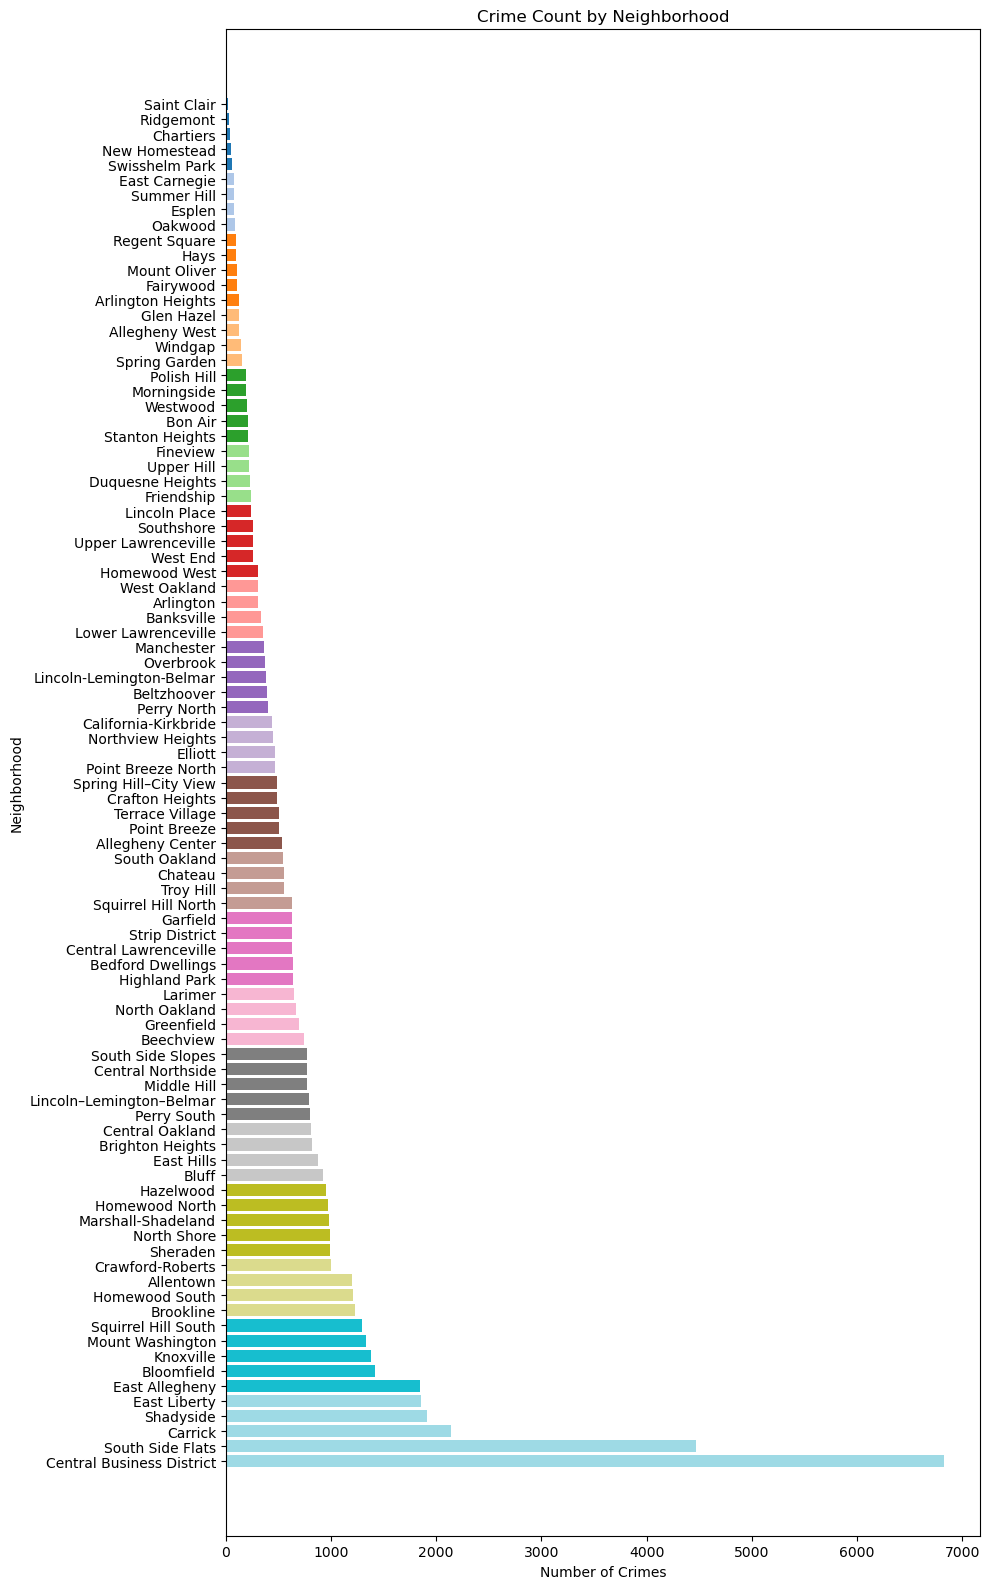

In [15]:
import matplotlib.pyplot as plt
import numpy as np


# Clean and sort
cleaned_counts = {str(k): int(v) for k, v in count_neighborhoods.items() if pd.notna(k)}
sorted_counts = dict(sorted(cleaned_counts.items(), key=lambda item: item[1], reverse=False))

# Create an array of colors with evenly spaced values between 0 and 1, with as many values as there are neighborhoods
#and then map them to every neighborhood
colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_counts)))
# Plot horizontal bar chart
plt.figure(figsize=(10, 16))
plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()), color=colors)
plt.xlabel("Number of Crimes")
plt.ylabel("Neighborhood")
plt.title("Crime Count by Neighborhood")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
#overall, these terms determine violence of a crime
violent_keywords = [
    "aggravated assault",
    "homicide",
    "robbery",
    "rape",
    "sexual assault",
    "assault",
    "shots fired",
    "weapons violation"
]

#take elements inside the offense type column, convert them to lower case
#then joins the words with "|" and gives us a series of True/False values (one for each row)
#finally, data[] filters the dataset using those T/F values
violent_data = data[data["NIBRS_Offense_Type"]
                    .str.lower()
                    .str.contains("|".join(violent_keywords), na=False)]


#empty dict to store violent crimes
violent_counts = {}

for col, row in violent_data.iterrows():
    #convert the neighborhoods into string and remove white spaces
    n = str(row["Neighborhood"]).strip()

    if n not in violent_counts:
        violent_counts[n] = 1
    else:
        violent_counts[n] += 1

violent_sorted = dict(sorted(violent_counts.items(), key=lambda x: x[1], reverse=False))

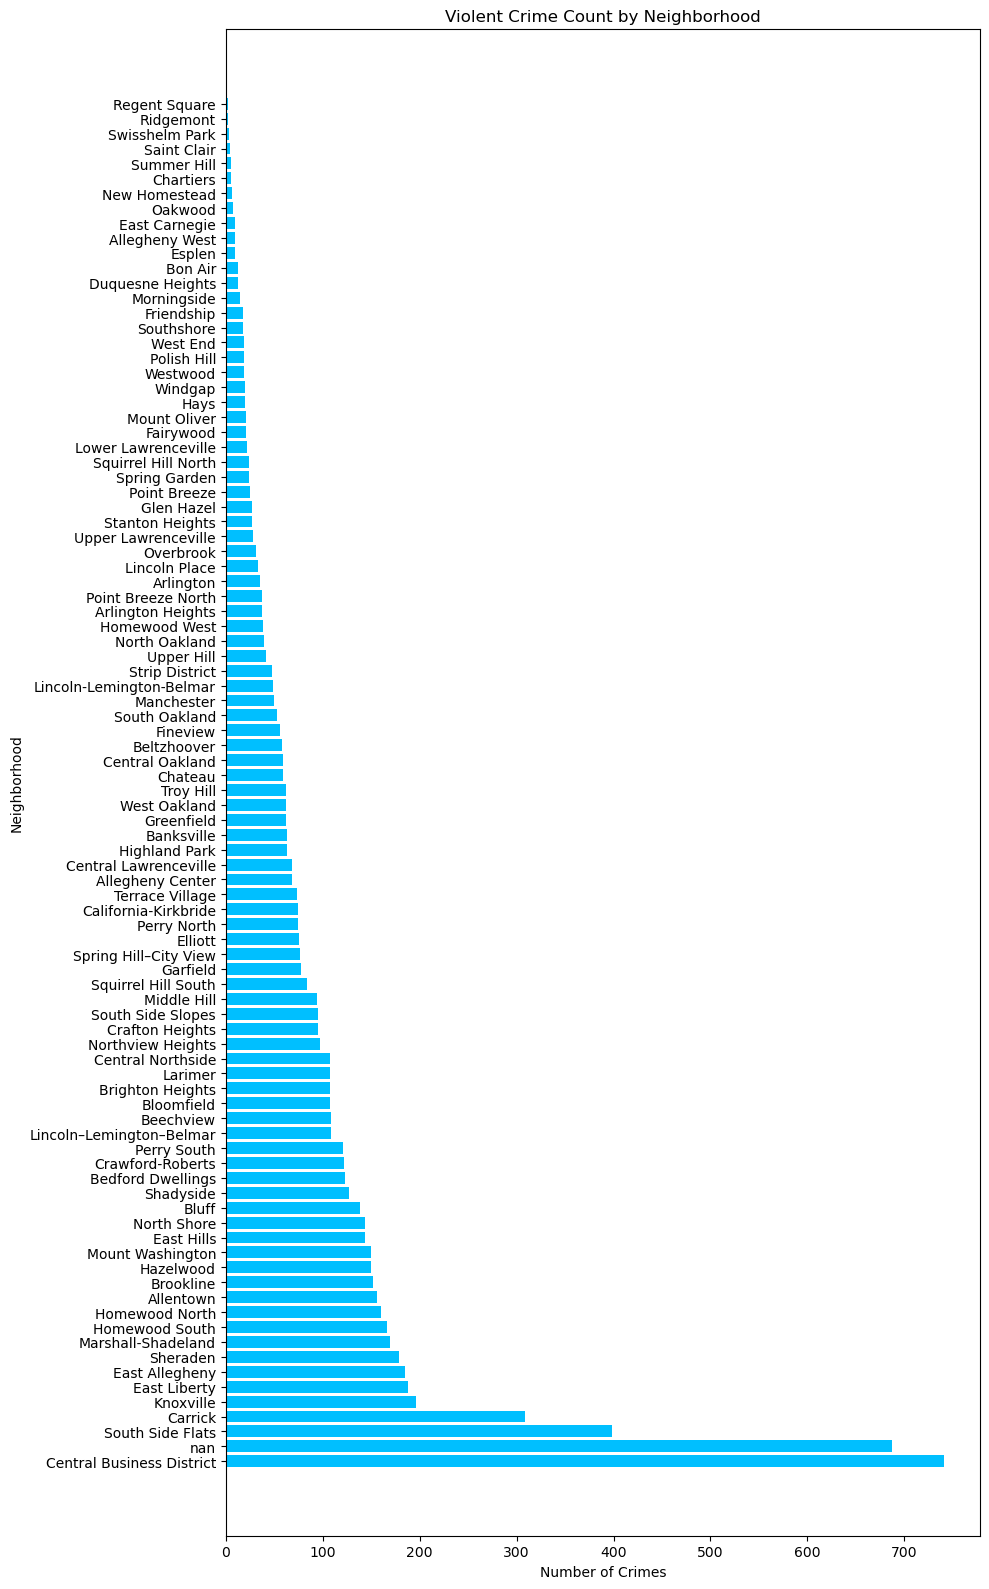

In [28]:

plt.figure(figsize=(10, 16))
plt.barh(list(violent_sorted.keys()), list(violent_sorted.values()), color="deepskyblue")
plt.xlabel("Number of Crimes")
plt.ylabel("Neighborhood")
plt.title("Violent Crime Count by Neighborhood")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The **violent crime** measure makes it clear that there is a considerable difference in levels of safety between Pittsburgh's communities. Those communities with higher numbers of violent crimes, including **Central Business District, South Side Flats, and Carrick**, represent areas with serious safety issues. Those with lower levels, such as **Redgemont, Saint Clair, and Regent Square**, demonstrate lower levels of violent crime and represent safer communities with perhaps a better quality of life.

This indicator is one of several important metrics for assessing safety. Those areas with lower levels of violent crimes can be considered "safer" areas and thus are preferred for residence or investment, making these areas ideal for consideration for Pittsburgh's best neighborhoods.

![gif](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeXpqZ21tdmYxY29jdHA2dHU5MjN5dGdtaG1wOWg4OXQxaTFvOWxscCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/igB2Th9e4nW6s/giphy.gif)